In [90]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,ConfusionMatrixDisplay,RocCurveDisplay
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import re
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from scipy import signal
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,ConfusionMatrixDisplay,RocCurveDisplay
from keras.layers import Dropout, BatchNormalization
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,ConfusionMatrixDisplay,RocCurveDisplay

In [6]:
## Loading dataset
df = pd.read_csv("name_gender_dataset.csv")

In [7]:
## checking Dataset
df.head(10)
#print(df_names[df_names['Count'] == 10])

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567
5,Mary,F,4169663,0.011411
6,David,M,3787547,0.010366
7,Joseph,M,2695970,0.007378
8,Richard,M,2638187,0.007220
9,Charles,M,2433540,0.006660


In [8]:
# To drop the columns where the count for male or female is smaller 

# Step 1: Group by Name and then keep the row with the highest Count within each group
def keep_max_count(group):
    return group.loc[group['Count'].idxmax()]

# Apply the function to each group
df_names = df.groupby('Name').apply(keep_max_count).reset_index(drop=True)

df_names.head(10)

,Name,Gender,Count,Probability
0,A,F,2,5.473480e-09
1,A'Aff,F,1,2.736740e-09
2,A'Aron,M,1,2.736740e-09
3,A'Dele,F,1,2.736740e-09
4,A'Isha,F,1,2.736740e-09
5,A'Ishah,F,1,2.736740e-09
6,A'Jana,F,1,2.736740e-09
7,A'Janae,F,1,2.736740e-09
8,A'Lmos,M,1,2.736740e-09
9,A'Nette,F,1,2.736740e-09


In [9]:
n_rows = df_names[df_names['Name'] == 'James']
n_rows


,Name,Gender,Count,Probability
52308,James,M,5304407,0.014517


In [10]:
name_row = df[df['Name'] == 'James']
name_row

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1615,James,F,23963,0.000066


In [11]:
## Checking dimensions of the dataframe
print(df_names.shape)

(133910, 4)


In [12]:
df_names['length'] = df_names['Name'].str.len()
df_names.sort_values('length', ascending=True, inplace=True)
df_names.head(100)

,Name,Gender,Count,Probability,length
0,A,F,2,5.473480e-09,1
94371,P,M,6,1.642040e-08,1
13782,B,M,3,8.210220e-09,1
97891,R,F,1,2.736740e-09,1
47969,I,M,3,8.210220e-09,1
...,...,...,...,...,...
125392,Va,M,69,1.888350e-07,2
57393,Jl,M,37,1.012590e-07,2
32930,Dj,M,764,2.090870e-06,2
57375,Jj,M,544,1.488790e-06,2


In [13]:
## Sort values by lenght
df_names = df_names.sort_values(by='length', ascending=False)
df_names

,Name,Gender,Count,Probability,length
20117,Carmelo-Antonio-Francesco,M,1,2.736740e-09,25
105736,Sandrine-Marie-Madeleine,F,1,2.736740e-09,24
89351,Nathan-Conway-Barrington,M,1,2.736740e-09,24
80486,Maria-Mandy-Antoninetta,F,1,2.736740e-09,23
84178,Merlin-Siegfried-Daniel,M,1,2.736740e-09,23
...,...,...,...,...,...
18874,C,M,1,2.736740e-09,1
41501,G,M,2,5.473480e-09,1
92784,O,F,1,2.736740e-09,1
104207,S,M,2,5.473480e-09,1


In [14]:
## We founnd probability is not giving interesting information here so we drop the column
df_names = df_names.drop('Probability', axis=1)
df_names

,Name,Gender,Count,length
20117,Carmelo-Antonio-Francesco,M,1,25
105736,Sandrine-Marie-Madeleine,F,1,24
89351,Nathan-Conway-Barrington,M,1,24
80486,Maria-Mandy-Antoninetta,F,1,23
84178,Merlin-Siegfried-Daniel,M,1,23
...,...,...,...,...
18874,C,M,1,1
41501,G,M,2,1
92784,O,F,1,1
104207,S,M,2,1


In [15]:
## Changing the gender to numerical classifiers

df_names['Gender'] = df_names['Gender'].replace({'M': 1, 'F': 0})
df_names.head(100)

,Name,Gender,Count,length
20117,Carmelo-Antonio-Francesco,1,1,25
105736,Sandrine-Marie-Madeleine,0,1,24
89351,Nathan-Conway-Barrington,1,1,24
80486,Maria-Mandy-Antoninetta,0,1,23
84178,Merlin-Siegfried-Daniel,1,1,23
...,...,...,...,...
79365,Malgosia-Dominique,0,1,18
118240,Tarlitah-Katreece,0,1,17
25195,Constantina-Maria,0,1,17
9086,Antonia-Elizabeth,0,1,17


In [16]:
## Remove names with one letter and bigger than 15
df_names.drop(df_names[df_names['length'] > 15].index, inplace = True)
df_names.drop(df_names[df_names['length'] == 1].index, inplace = True)
df_names

,Name,Gender,Count,length
106986,Seanchristopher,1,10,15
58514,Jordanchristoph,1,5,15
41559,Gabrielalexande,1,6,15
105285,Samantha-Evonne,0,1,15
95163,Patrick-Rajakna,1,1,15
...,...,...,...,...
103476,Ru,0,1,2
123855,Tu,1,357,2
133678,Zy,1,48,2
44862,Ha,0,468,2


In [17]:
# Group by all columns and calculate size (count) for each group
df_names.drop(df_names[df_names['Count'] <= 5].index, inplace = True)
df_names.sort_values(by="length", ascending=True).head(10)

,Name,Gender,Count,length
2528,Ah,1,75,2
93096,Ok,0,35,2
113312,So,0,56,2
29241,De,1,705,2
77079,Ly,0,304,2
37632,En,1,17,2
34190,Du,1,24,2
112989,Sj,1,11,2
47973,Ia,0,164,2
133060,Zi,0,98,2


In [18]:
## Delete names containing special characters
df_names = df_names[~df_names['Name'].str.contains('-')]
df_names = df_names[~df_names['Name'].str.contains('@')]

## Check for special characters
special_char_pattern = re.compile(r'[^a-zA-Z0-9 ]')
df_names['Has_Special_Char'] = df_names['Name'].str.contains(special_char_pattern)
df_clean = df_names[~df_names['Has_Special_Char']]
# df_cleaned = df_names[~df_names['Has_Special_Char']].drop(columns=['Has_Special_Char'])

df_clean['Has_Special_Char'] = df_clean['Name'].str.contains(special_char_pattern)
df_clean = df_clean.drop(columns='Has_Special_Char', axis =1)
df_clean


C:\Users\aldoe\AppData\Local\Temp\ipykernel_6308\2625995189.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Has_Special_Char'] = df_clean['Name'].str.contains(special_char_pattern)


,Name,Gender,Count,length
106986,Seanchristopher,1,10,15
41559,Gabrielalexande,1,6,15
104002,Ryanchristopher,1,45,15
23690,Christiananthon,1,12,15
82341,Matthewalexande,1,11,15
...,...,...,...,...
97894,Ra,1,113,2
123855,Tu,1,357,2
133678,Zy,1,48,2
44862,Ha,0,468,2


In [19]:
## names to upper to dont have problems in next steps
df_clean['Name'] = df_clean['Name'].apply(lambda x: x.upper() if isinstance(x, str) else x)
df_clean.head(15)

,Name,Gender,Count,length
106986,SEANCHRISTOPHER,1,10,15
41559,GABRIELALEXANDE,1,6,15
104002,RYANCHRISTOPHER,1,45,15
23690,CHRISTIANANTHON,1,12,15
82341,MATTHEWALEXANDE,1,11,15
57955,JOHNCHRISTOPHER,1,132,15
23699,CHRISTIANMICHAE,1,11,15
23697,CHRISTIANJOSEPH,1,22,15
11422,ASHLEYELIZABETH,0,8,15
23796,CHRISTOPHERANTH,1,6,15


In [20]:
# Function to convert string to ASCII values and pad with zeros if length is less than 5
def string_to_ascii_padded(s):
    ascii_values = [(ord(c)-64) for c in s]
    while len(ascii_values) < 15:
        ascii_values.append(0)
    return ascii_values

# Apply the function to the 'names' column
df_clean['encoded_names'] = df_clean['Name'].apply(string_to_ascii_padded)
## df_names = df_names.drop('names_ascii', axis=1)

df_clean['name_ascii'] = [','.join(map(str, l)) for l in df_clean['encoded_names']]

df_clean = df_clean.drop('encoded_names', axis=1)

df_clean.sort_index()

,Name,Gender,Count,length,name_ascii
13,AABAN,1,115,5,"1,1,2,1,14,0,0,0,0,0,0,0,0,0,0"
14,AABHA,0,35,5,"1,1,2,8,1,0,0,0,0,0,0,0,0,0,0"
15,AABID,1,20,5,"1,1,2,9,4,0,0,0,0,0,0,0,0,0,0"
18,AABIR,1,10,5,"1,1,2,9,18,0,0,0,0,0,0,0,0,0,0"
21,AABRIELLA,0,38,9,"1,1,2,18,9,5,12,12,1,0,0,0,0,0,0"
...,...,...,...,...,...
133904,ZYVA,0,23,4,"26,25,22,1,0,0,0,0,0,0,0,0,0,0,0"
133906,ZYVON,1,7,5,"26,25,22,15,14,0,0,0,0,0,0,0,0,0,0"
133907,ZYYANNA,0,6,7,"26,25,25,1,14,14,1,0,0,0,0,0,0,0,0"
133908,ZYYON,1,6,5,"26,25,25,15,14,0,0,0,0,0,0,0,0,0,0"


In [21]:
# Split the 'encoded_names' column into separate columns

# Drop columns that we are not going to use
df_pre = df_clean.drop(["Name", "Count", "length"], axis=1)
df_pre

name_ascii_split = df_clean['name_ascii'].str.split(',', expand=True)

# Concatenate the new DataFrame with the 'Gender' column
result_df= pd.concat([df_clean['Gender'], name_ascii_split], axis=1)

result_df = result_df.astype(int)
# result_df = result_df[["Gender","0","1","2","3","4","5","6","7","8","9","10","11","12","13","14"]]

cols = result_df.columns.tolist()
cols.append(cols.pop(cols.index('Gender')))
df_pro = result_df[cols]

df_pro

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Gender
106986,19,5,1,14,3,8,18,9,19,20,15,16,8,5,18,1
41559,7,1,2,18,9,5,12,1,12,5,24,1,14,4,5,1
104002,18,25,1,14,3,8,18,9,19,20,15,16,8,5,18,1
23690,3,8,18,9,19,20,9,1,14,1,14,20,8,15,14,1
82341,13,1,20,20,8,5,23,1,12,5,24,1,14,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97894,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
123855,20,21,0,0,0,0,0,0,0,0,0,0,0,0,0,1
133678,26,25,0,0,0,0,0,0,0,0,0,0,0,0,0,1
44862,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
#Define X and y for further analysis

X_values = df_pro.iloc[:, :-1]
Y_values = df_pro.iloc[:, -1]


### Neural Networks

**Tensor Flow and Keras**

In [23]:
## importing libraries
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)
X = X_values.to_numpy()
## Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y_values, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0],1,1*15)
y_train = y_train.to_numpy().reshape(-1,1)
X_test = X_test.reshape(X_test.shape[0],1,1*15)
y_test = y_test.to_numpy().reshape(-1,1)

In [25]:
#Definition of the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1, 15)),
    keras.layers.Dense(2048, activation='sigmoid'),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(256, activation='sigmoid'),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])


c:\Users\aldoe\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_split=0.1)

Epoch 1/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.6231 - loss: 0.6948 - val_accuracy: 0.6242 - val_loss: 0.6624
Epoch 2/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6280 - loss: 0.6624 - val_accuracy: 0.6242 - val_loss: 0.6667
Epoch 3/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6293 - loss: 0.6622 - val_accuracy: 0.6242 - val_loss: 0.6619
Epoch 4/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6313 - loss: 0.6605 - val_accuracy: 0.6242 - val_loss: 0.6626
Epoch 5/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6285 - loss: 0.6623 - val_accuracy: 0.6242 - val_loss: 0.6624
Epoch 6/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6276 - loss: 0.6625 - val_accuracy: 0.6242 - val_loss: 0.6701
Epoch 7/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.6276 - loss: 0.6628 - val_accuracy: 0.6242 - val_loss: 0.6620
Epoch 8/10
1947/1947 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.6258 -

In [28]:
## Accuracy and loss
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)

541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6407 - loss: 0.6531
Test accuracy: 0.6385967135429382


In [29]:
# Make predictions 
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


# Print the predicted values and the true values
print('Predicted classes:', predicted_classes)
print('True classes:', y_test)

541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted classes: [0 0 0 ... 0 0 0]
True classes: [[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [0]]


In [30]:
def string_to_ascii_padded(s):
    s = s.upper()
    ascii_values = [(ord(c) - 64) for c in s]
    while len(ascii_values) < 15:
        ascii_values.append(0)
    return ascii_values

# Function to predict gender using the trained Keras model
def predict_gender_keras(name, keras_model):
    # Convert the name to its ASCII representation and pad
    ascii_values = string_to_ascii_padded(name)
    # Convert to numpy array and reshape for the model
    input_data = np.array(ascii_values).reshape(1, 1, 15)
    # Predict using the Keras model
    predictions = keras_model.predict(input_data)
    # Convert the output probabilities to a class label
    predicted_class = np.argmax(predictions, axis=1)
    # Map the class label to gender
    gender = 'Male' if predicted_class[0] == 1 else 'Female'
    return gender

In [31]:
## Predict a given name
name_to_predict = "rosy"
predicted_gender = predict_gender_keras(name_to_predict, model)
print(f"The predicted gender for the name '{name_to_predict}' is: {predicted_gender}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The predicted gender for the name 'rosy' is: Female


---
### ROC CURVE

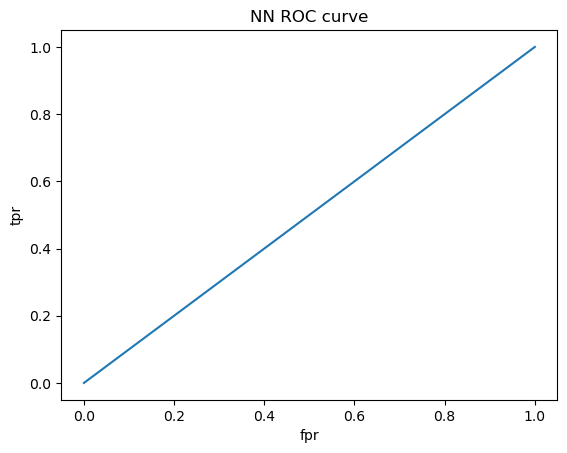

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_classes)


plt.plot()
plt.plot(fpr,tpr, label='NN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'NN ROC curve')
plt.show()

---

### Convolutional Neural Network


In [33]:
## LAYER class for forward and backward propagation

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update parameters and return input gradient
        pass

In [34]:
## Activation Layer
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))    

In [35]:
## Activation layer function definition

class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)

        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2

        super().__init__(tanh, tanh_prime)

class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)

        super().__init__(sigmoid, sigmoid_prime)

class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output

    def backward(self, output_gradient, learning_rate):
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_gradient)

In [36]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.mean(output_gradient, axis=1, keepdims=True)
        return input_gradient

In [37]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)

    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")

        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient

In [38]:

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

def binary_cross_entropy(y_true, y_pred):
    return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

In [39]:
class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, input):
        return np.reshape(input, self.output_shape)

    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)

In [41]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs=1000, learning_rate=0.01, verbose=True):
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            x = x.reshape(-1, 1)  # Reshape input for the network
            y = y.reshape(-1, 1)  # Reshape target for the network

            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")


In [42]:
# Preprocess your data
def preprocess_data(X, y):
    # Convert X to a numpy array and normalize
    X = X.to_numpy().astype('float32')
    X = X / 26  # Normalize the input to be in the range [0, 1]

    # Convert y to a numpy array and one-hot encode
    y = y.to_numpy()
    y = to_categorical(y, 2).reshape(len(y), 2, 1)

    return X, y

In [43]:
x_train, y_train = preprocess_data(X_values, Y_values)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [44]:
# Define the neural network architecture
network = [
    Dense(15, 100),  # Adjust the input size to 15 (the number of features)
    Sigmoid(),
    Dense(100, 50),
    Sigmoid(),
    Dense(50, 2),  # The output layer should have 2 neurons for binary classification
    Sigmoid()
]

# Train the network
train(
    network,
    binary_cross_entropy,
    binary_cross_entropy_prime,
    x_train,
    y_train,
    epochs=50,
    learning_rate=0.01
)

1/50, error=0.6645946600047179
2/50, error=0.6572299942510915
3/50, error=0.6520795025423736
4/50, error=0.6464986753709224
5/50, error=0.6392904214415922
6/50, error=0.6323189032529847
7/50, error=0.6266864519670363
8/50, error=0.6214579157076212
9/50, error=0.6151288162081912
10/50, error=0.6085066899569472
11/50, error=0.60244860413751
12/50, error=0.5964095376171429
13/50, error=0.5895914446291446
14/50, error=0.5834489731224417
15/50, error=0.57823163551871
16/50, error=0.5736269420882717
17/50, error=0.5694898286048038
18/50, error=0.5657253768354014
19/50, error=0.5622403155588462
20/50, error=0.5589514637645934
21/50, error=0.5557871476913873
22/50, error=0.5527576581994746
23/50, error=0.5498603926021743
24/50, error=0.5470775675861894
25/50, error=0.544398922951785
26/50, error=0.5418186245330399
27/50, error=0.5393340969835466
28/50, error=0.5369431041112999
29/50, error=0.5346399203599939
30/50, error=0.532413489026704
31/50, error=0.5302523108526624
32/50, error=0.52815575

In [61]:
# Test the network and calculate accuracy
correct_predictions = 0
total_predictions = len(x_test)
y_pred = []
y_true = []

for x, y in zip(x_test, y_test):
    x = x.reshape(-1, 1)  # Reshape input for the network
    y = y.reshape(-1, 1)  # Reshape target for the network
    output = predict(network, x)
    
    ## print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")
    
    predicted_label = np.argmax(output)
    true_label = np.argmax(y)
    y_pred.append(predicted_label)
    y_true.append(true_label)
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.42%


In [62]:

def string_to_ascii_padded(name):
    # Convert the name to uppercase
    name = name.upper()
    # Convert each character to its ASCII value (A=1, B=2, ..., Z=26)
    ascii_values = [(ord(c) - 64) for c in name if 'A' <= c <= 'Z']
    # Pad with zeros if length is less than 15
    while len(ascii_values) < 15:
        ascii_values.append(0)
    # Truncate if length is more than 15
    if len(ascii_values) > 15:
        ascii_values = ascii_values[:15]
    return ascii_values

In [63]:
def predict_gender_custom(name, custom_model):
    # Convert the name to its ASCII representation
    ascii_values = string_to_ascii_padded(name)
    # Convert to numpy array and reshape for the custom model
    input_data = np.array(ascii_values).reshape(15, 1)
    # Forward pass through the custom neural network
    output = input_data
    for layer in custom_model:
        output = layer.forward(output)
    # Convert the output to a class label
    predicted_class = np.argmax(output, axis=0)
    # Map the class label to gender
    gender = 'Male' if predicted_class[0] == 1 else 'Female'
    return gender

In [64]:

name_to_predict = "Alan"
predicted_gender = predict_gender_custom(name_to_predict, network)
print(f"The predicted gender for the name '{name_to_predict}' is: {predicted_gender}")

The predicted gender for the name 'Alan' is: Female


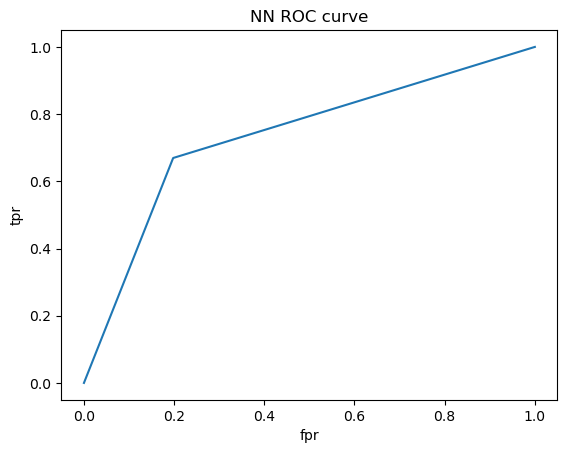

In [66]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)


plt.plot()
plt.plot(fpr,tpr, label='NN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'NN ROC curve')
plt.show()

## Logistic Regression

In [71]:
## Reusing variables for further analysis
X = df_pro.iloc[:, :-1]
y = df_pro.iloc[:, -1]

**First Approach**

c:\Users\aldoe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Accuracy: 0.63



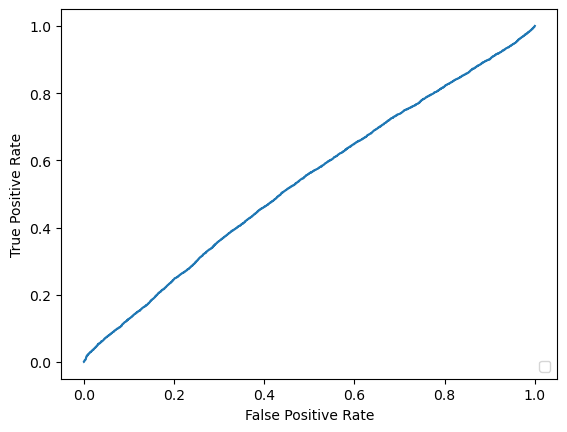

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model = LogisticRegression(penalty='l2', C=1, solver='saga')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}\n')

y_pred = model.predict(X_test)
y_score = model.decision_function(X_test)
# Calculate the true positive rate and false positive rate for a range of thresholds
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

**Second approach**

In [77]:
df_lr = df_names[~df_names['Has_Special_Char']]
df_lr['Has_Special_Char'] = df_lr['Name'].str.contains(special_char_pattern)
df_lr = df_lr.drop(columns='Has_Special_Char', axis =1)

df_lr['l3_letters'] = df_lr['Name'].str[-3:]
df_lr['l2_letters'] = df_lr['Name'].str[-2:]
df_lr['l1_letters'] = df_lr['Name'].str[-1:]


df_lr = df_lr.drop('Count', axis=1)
df_lr = df_lr.drop('length', axis=1)
df_lr

df_lr = df_lr.drop('Name', axis=1)

df_lr = pd.get_dummies(df_lr, columns=['l3_letters', 'l2_letters', 'l1_letters'])

df_lr

C:\Users\aldoe\AppData\Local\Temp\ipykernel_6308\3681079799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['Has_Special_Char'] = df_lr['Name'].str.contains(special_char_pattern)


,Gender,l3_letters_Ab,l3_letters_Aba,l3_letters_Abb,l3_letters_Abd,l3_letters_Abe,l3_letters_Abi,l3_letters_Abu,l3_letters_Aby,l3_letters_Ac,...,l1_letters_q,l1_letters_r,l1_letters_s,l1_letters_t,l1_letters_u,l1_letters_v,l1_letters_w,l1_letters_x,l1_letters_y,l1_letters_z
106986,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41559,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104002,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
23690,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82341,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97894,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123855,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
133678,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
44862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Accuracy: 0.86



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


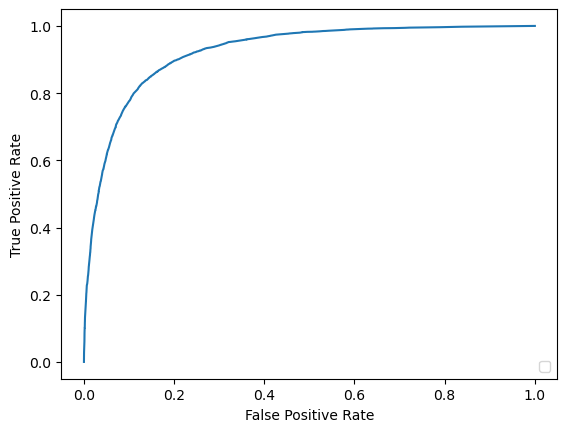

In [79]:
X = df_lr.drop(columns='Gender')
y = df_lr['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

model = LogisticRegression(penalty='l2', C=1, solver='saga')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

# Make predictions on the test set
y_pred = model.predict(X_test)


y_score = model.decision_function(X_test)
# Calculate the true positive rate and false positive rate for a range of thresholds
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

# Plot the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


In [80]:
y_pred = model.predict(X_test)
print("Predicted value:\n", y_pred[0:10])
print("Real value:\n", y_test[0:10])

Predicted value:
 [0 0 0 0 0 0 1 0 1 0]
Real value:
 1374      0
24787     0
120704    0
5603      0
78746     0
132963    0
7622      0
58195     0
65859     1
87274     0
Name: Gender, dtype: int64


In [81]:
# 7622
index_list = [1374,24787,120704,65859,7622]
df_names.loc[index_list]

,Name,Gender,Count,length,Has_Special_Char
1374,Adalisa,0,6,7,False
24787,Cne,0,11,3,False
120704,Theretha,0,21,8,False
65859,Keyuntae,1,11,8,False
7622,Anel,0,1849,4,False


### Light GBM

**First approach**

In [82]:
X = df_pro.iloc[:, :-1]
y = df_pro.iloc[:, -1]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lgb = lgb.LGBMClassifier()

parameters = {'num_leaves':[100], 'min_child_samples':[15], 'max_depth':[20],
              'learning_rate':[0.2], 'reg_alpha':[0.03]}

clf = GridSearchCV(lgb, parameters, cv = 2)
clf.fit(X=X_train, y = y_train)

c:\Users\aldoe\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aldoe\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


[LightGBM] [Info] Number of positive: 12783, number of negative: 21820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 34603, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369419 -> initscore=-0.534711
[LightGBM] [Info] Start training from score -0.534711
[LightGBM] [Info] Number of positive: 12784, number of negative: 21820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 34604, number of used features: 14
[LightGBM] [Info] [b

GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.2], 'max_depth': [20],
                         'min_child_samples': [15], 'num_leaves': [100],
                         'reg_alpha': [0.03]})

In [84]:
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
a = pd.crosstab(y_test, predictions)
print(score)
print(a.max(axis=1)/a.sum(axis=1))

0.8848688012946481
Gender
0    0.911635
1    0.839702
dtype: float64


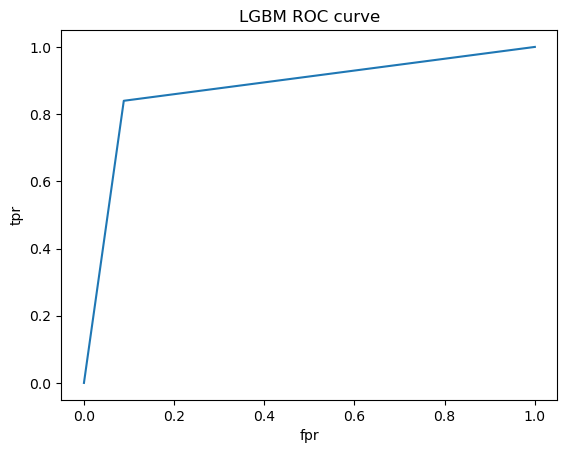

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.plot()
plt.plot(fpr,tpr, label='LGBM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'LGBM ROC curve')
plt.show()

In [86]:
print('Predicted values:\n', predictions[0:10])
print("Tested values:\n", y_test[0:10])

Predicted values:
 [0 0 0 0 0 0 0 0 0 1]
Tested values:
 95641    1
49684    0
36895    0
7054     0
89346    0
78640    0
59507    0
93469    0
85840    0
5554     1
Name: Gender, dtype: int32


**Second approach**

In [87]:
df_lgbm = df_names[~df_names['Has_Special_Char']]
df_lgbm['Has_Special_Char'] = df_lgbm['Name'].str.contains(special_char_pattern)
df_lgbm = df_lgbm.drop(columns='Has_Special_Char', axis =1)

df_lgbm['l3_letters'] = df_lgbm['Name'].str[-3:]
df_lgbm['l2_letters'] = df_lgbm['Name'].str[-2:]
df_lgbm['l1_letters'] = df_lgbm['Name'].str[-1:]

df_lgbm = pd.get_dummies(df_lgbm, columns=['l3_letters', 'l2_letters', 'l1_letters'])

df_lgbm = df_lgbm.drop('Count', axis=1)
df_lgbm = df_lgbm.drop('length', axis=1)
df_lgbm = df_lgbm.drop('Name', axis=1)

X = df_lgbm.drop(columns='Gender')
y = df_lgbm['Gender']

C:\Users\aldoe\AppData\Local\Temp\ipykernel_6308\3317871758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lgbm['Has_Special_Char'] = df_lgbm['Name'].str.contains(special_char_pattern)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lgb = lgb.LGBMClassifier()

parameters = {'num_leaves':[100], 'min_child_samples':[15], 'max_depth':[20],
              'learning_rate':[0.2], 'reg_alpha':[0.03]}

clf = GridSearchCV(lgb, parameters, cv = 2)
clf.fit(X=X_train, y = y_train)

[LightGBM] [Info] Number of positive: 12798, number of negative: 21805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1258
[LightGBM] [Info] Number of data points in the train set: 34603, number of used features: 629
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369852 -> initscore=-0.532850
[LightGBM] [Info] Start training from score -0.532850
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

GridSearchCV(cv=2, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.2], 'max_depth': [20],
                         'min_child_samples': [15], 'num_leaves': [100],
                         'reg_alpha': [0.03]})

In [92]:
predictions = clf.predict(X_test)
score = accuracy_score(y_test, predictions)
a = pd.crosstab(y_test, predictions)
print(score)
print(a.max(axis=1)/a.sum(axis=1))

0.8547566755288406
Gender
0    0.882402
1    0.807770
dtype: float64


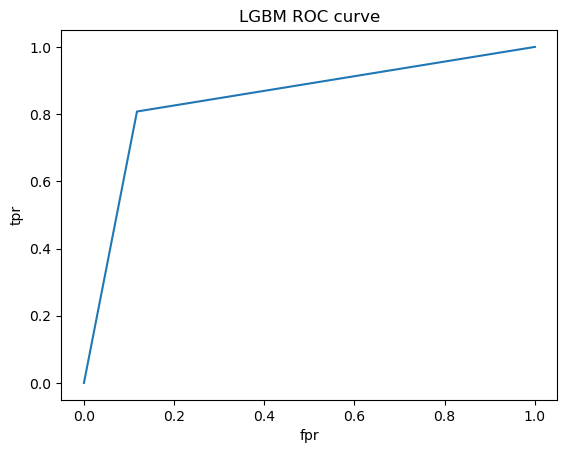

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.plot()
plt.plot(fpr,tpr, label='LGBM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'LGBM ROC curve')
plt.show()